In [4]:
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

# Lets import the files that we need.

In [2]:
teams = pd.read_csv('team.csv')
players = pd.read_csv('batting.csv')
salaries = pd.read_csv('salary.csv')
info = pd.read_csv('player.csv')

In [3]:
players.head()

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


# Exercise 1: 
## a) Compute the correlation between mean salary and year.
## b) Generate a graph of mean salary per year.

In [4]:
# Let's print a few entries
salaries.head()

,year,team_id,league_id,player_id,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


### First we need to create a table for the average salary vs year

In [5]:
yearlyMean = salaries.groupby('year')['salary'].mean().reset_index()
yearlyMean.head()

,year,salary
0,1985,476299
1,1986,417147
2,1987,434729
3,1988,453171
4,1989,506323


## Lets use pandas correlation function to answer the first part of exercise 1.

In [6]:
yearlyMean.corr()

,year,salary
year,1.000000,0.983687
salary,0.983687,1.000000


In [7]:
## Lets generate a scatter plot for part b of exercise 1.

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


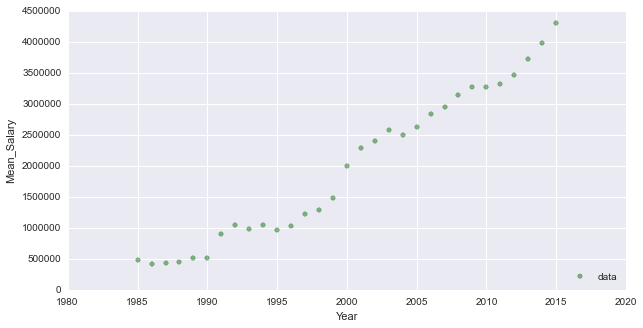

In [8]:
plt.scatter(yearlyMean['year'], yearlyMean['salary'], c="g",
            label='data', alpha=0.5)
plt.legend(loc=4)
plt.xlabel('Year')
plt.ylabel('Mean_Salary')
plt.show()

# Exercise 2: 
## a) Find the best line that approximates mean salary with respect to years. 
## b) Plot this line together with the data from exercise 1.

### numpy has a function called 'polyfit' that find the polynomial curve of any degree specified that best approximates the data. In our case we will use degree  = 1.

In [9]:
b1, b0 = np.polyfit(yearlyMean['year'], yearlyMean['salary'],1)

In [10]:
# Let see what these values are
print(b1, b0)

132492.016129 -263004611.968


In [11]:
# This function will generate points on the line with the previous slope and intercept
def Line(year):
    return b1*year+b0
X = list(yearlyMean['year'])
y = [Line(x) for x in X]

### Lets generate the graph

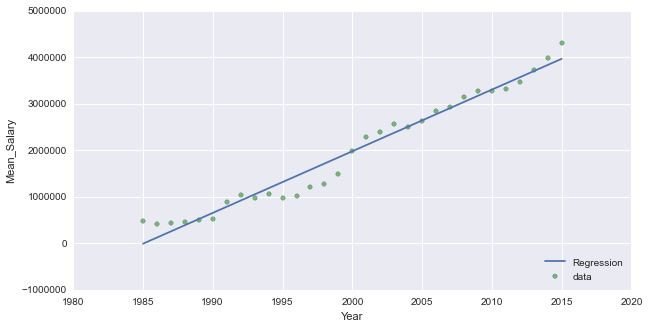

In [12]:
plt.scatter(yearlyMean['year'], yearlyMean['salary'], c="g", 
            label='data', alpha=0.5)
plt.plot(X,y, label='Regression')
plt.legend(loc=4)
plt.xlabel('Year')
plt.ylabel('Mean_Salary')
plt.show()

### Lets look at the Ordinary Least Squares Regression Results.

In [13]:
linear_regression = smf.ols(formula='year ~ salary', data=yearlyMean)
fitted_model = linear_regression.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   year   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     867.2
Date:                Wed, 28 Dec 2016   Prob (F-statistic):           3.70e-23
Time:                        14:13:53   Log-Likelihood:                -58.730
No. Observations:                  31   AIC:                             121.5
Df Residuals:                      29   BIC:                             124.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1985.5435      0.575   3454.992      0.0

# Exercise 3: Create a box plot for salaries per year.

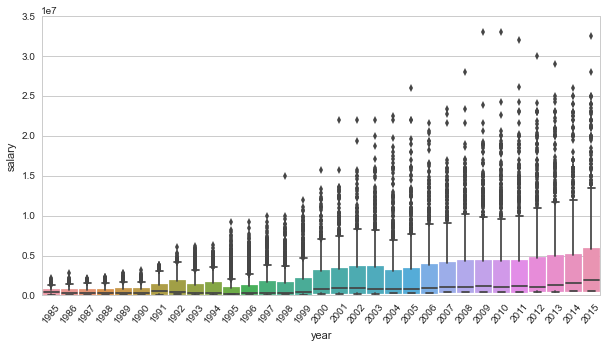

In [14]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="year", y="salary", data=salaries)
plt.setp(ax.get_xticklabels(), rotation=50)
plt.show(ax)

# Exercise 4: From the previous graph we can see an increasing disparity in salaries as time increases. 
## a) How would you measure disparity in salaries? 
## b) Compute the correlation of disparity and years.
## c) Find the best line that approximates disparity with respect to years.

## a) We can use the standard deviation as a measure of disparity.

In [15]:
# Lets create a table with the data we need.
yearly_std = salaries.groupby('year')['salary'].std().reset_index()
yearly_std.columns = ['year', 'std']
yearly_std.head()

,year,std
0,1985,343320.889497
1,1986,394017.573716
2,1987,431182.170169
3,1988,453158.099159
4,1989,538045.431737


## Answer to part b

In [16]:
yearly_std.corr()

,year,std
year,1.000000,0.992156
std,0.992156,1.000000


## Lets generate a graph for part c.

In [17]:
b1, b0 = np.polyfit(yearly_std['year'], yearly_std['std'],1)

In [18]:
print(b1, b0)

182088.434962 -361570611.905


In [19]:
def Line2(year):
    return b1*year+b0
X = list(yearly_std['year'])
y = [Line2(x) for x in X]

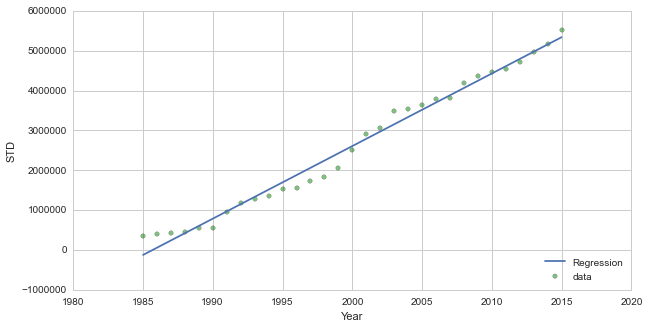

In [20]:
plt.scatter(yearly_std['year'], yearly_std['std'], c="g", 
            label='data', alpha=0.5, )
plt.plot(X,y, label='Regression')
plt.legend(loc=4)
plt.xlabel('Year')
plt.ylabel('STD')
plt.show()

In [21]:
linear_regression = smf.ols(formula='year ~ std', data=yearly_std)
fitted_model = linear_regression.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   year   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1827.
Date:                Wed, 28 Dec 2016   Prob (F-statistic):           9.57e-28
Time:                        14:14:26   Log-Likelihood:                -47.447
No. Observations:                  31   AIC:                             98.89
Df Residuals:                      29   BIC:                             101.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1985.9105      0.390   5097.676      0.0

# Exercise 5: 
## a) Build a predictive model for the amount of hits for a team given Games played, Wins, Walks by batters, At bats, Fielding  percentage, Outs Pitched (innings pitched x 3), Hits allowed, Earned runs allowed, Doubles. To solve this problem you will use team.csv. 

## b) How does your model measure accuracy?
## c) What was the score for its accuracy?
## d) Choose two features and create a 3d plot of feature1, feature2, h.

In [22]:
np.array(teams.columns)

array(['year', 'league_id', 'team_id', 'franchise_id', 'div_id', 'rank',
       'g', 'ghome', 'w', 'l', 'div_win', 'wc_win', 'lg_win', 'ws_win',
       'r', 'ab', 'h', 'double', 'triple', 'hr', 'bb', 'so', 'sb', 'cs',
       'hbp', 'sf', 'ra', 'er', 'era', 'cg', 'sho', 'sv', 'ipouts', 'ha',
       'hra', 'bba', 'soa', 'e', 'dp', 'fp', 'name', 'park', 'attendance',
       'bpf', 'ppf', 'team_id_br', 'team_id_lahman45', 'team_id_retro'], dtype=object)

In [23]:
teams.corr().head()

,year,rank,g,ghome,w,l,r,ab,h,double,...,ha,hra,bba,soa,e,dp,fp,attendance,bpf,ppf
year,1.000000,-0.293981,0.601304,0.341956,0.418790,0.425112,0.273367,0.605436,0.506059,0.683101,...,0.507877,0.884038,0.572311,0.879181,-0.833145,0.517770,0.777934,0.810843,0.002673,-0.007313
rank,-0.293981,1.000000,-0.171295,-0.085398,-0.732510,0.502550,-0.447966,-0.199481,-0.306493,-0.364275,...,0.046543,-0.173527,0.013765,-0.346624,0.308794,-0.030141,-0.298955,-0.465841,-0.161572,0.117475
g,0.601304,-0.171295,1.000000,0.963764,0.676371,0.661355,0.532620,0.986522,0.867794,0.679297,...,0.858471,0.549978,0.776006,0.641185,-0.494665,0.612708,0.859709,0.405767,0.040381,-0.005753
ghome,0.341956,-0.085398,0.963764,1.000000,0.358841,0.295313,0.353552,0.904329,0.547261,0.379173,...,0.519463,0.408671,0.370675,0.490309,-0.208608,0.406277,0.319166,0.345927,0.002186,-0.009417
w,0.418790,-0.732510,0.676371,0.358841,1.000000,-0.102111,0.677243,0.689233,0.725160,0.586949,...,0.413214,0.320302,0.380921,0.518630,-0.430352,0.302562,0.644387,0.398222,0.158806,-0.098700


corrW = teams.corr()['h'].reset_index()

corrW[(corrW['h'] >= .7) | (corrW['h'] <= -.7)]

## Lets extract the data we need

In [24]:
data = teams[['g', 'h', 'w', 'bb', 'ab', 'fp', 'ipouts', 'ha','er', 'double']]
data.head()

,g,h,w,bb,ab,fp,ipouts,ha,er,double
0,31,426,20,60,1372,0.83,828,367,109,70
1,28,323,19,60,1196,0.82,753,308,77,52
2,29,328,10,26,1186,0.81,762,346,116,35
3,19,178,7,33,746,0.80,507,261,97,19
4,33,403,16,33,1404,0.83,879,373,121,43


## Let's build a model using the Linear Regression from sklearn.

In [25]:
lr = LinearRegression()

In [26]:
X = data.drop('h',1)
y = data['h']

In [27]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Part c

In [28]:
lr.score(X, y)

0.95718636744623342

### Part d 

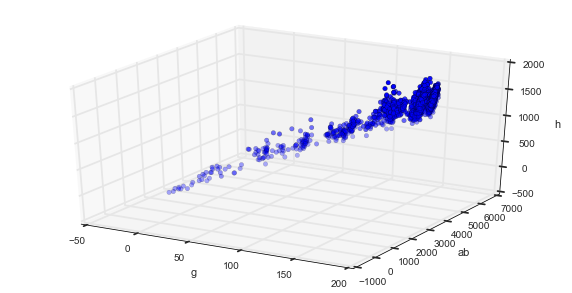

In [29]:
from mpl_toolkits.mplot3d import Axes3D
#import matplotlib.pyplot as plt


#def randrange(n, vmin, vmax):
    #return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = data['g']
ys = data['ab']
zs = data['h']
ax.scatter(xs, ys, zs)

ax.set_xlabel('g')
ax.set_ylabel('ab')
ax.set_zlabel('h')

plt.show()

# Exercise 6: Build a similar model to predict average hits per year based on Games played, At bats and whether a player is a left or right handed batter. Consider only those players who are either left or right handed batters and for the moment do not worry about missing data or ambidextrous batters. 

In [30]:
# Lets start by taking a look at info table.
info.head()

,player_id,birth_year,birth_month,birth_day,birth_country,birth_state,birth_city,death_year,death_month,death_day,...,name_last,name_given,weight,height,bats,throws,debut,final_game,retro_id,bbref_id
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [31]:
info.columns

Index(['player_id', 'birth_year', 'birth_month', 'birth_day', 'birth_country',
       'birth_state', 'birth_city', 'death_year', 'death_month', 'death_day',
       'death_country', 'death_state', 'death_city', 'name_first', 'name_last',
       'name_given', 'weight', 'height', 'bats', 'throws', 'debut',
       'final_game', 'retro_id', 'bbref_id'],
      dtype='object')

### Pulling only Left and right batters.

In [32]:
LRB = info[(info['bats'] == 'L') | (info['bats'] == 'R')][['player_id', 'bats']]

In [33]:
LRB.head()

,player_id,bats
0,aardsda01,R
1,aaronha01,R
2,aaronto01,R
3,aasedo01,R
4,abadan01,L


In [34]:
players.head()

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [35]:
players.columns

Index(['player_id', 'year', 'stint', 'team_id', 'league_id', 'g', 'ab', 'r',
       'h', 'double', 'triple', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb',
       'hbp', 'sh', 'sf', 'g_idp'],
      dtype='object')

In [36]:
stats = players[['player_id','year', 'g', 'h', 'bb']]

In [37]:
stats.head()

,player_id,year,g,h,bb
0,abercda01,1871,1,0.0,0.0
1,addybo01,1871,25,32.0,4.0
2,allisar01,1871,29,40.0,2.0
3,allisdo01,1871,27,44.0,0.0
4,ansonca01,1871,25,39.0,2.0


## Lets first group by player by year and sum to take care of players that switched teams then we'll average by player.

In [38]:
stats = stats.groupby(['player_id', 'year'])[stats.columns[2:]].sum().reset_index()
stats = stats.groupby(['player_id'])[stats.columns[2:]].mean().reset_index()
stats.head()

,player_id,g,h,bb
0,aardsda01,36.777778,0.000000,0.000000
1,aaronha01,143.391304,163.956522,60.956522
2,aaronto01,62.428571,30.857143,12.285714
3,aasedo01,34.461538,0.000000,0.000000
4,abadan01,5.000000,0.666667,1.333333


## Joining both tables on player_id

In [39]:
data = LRB.merge(stats, how='left', on='player_id')
data.head()

,player_id,bats,g,h,bb
0,aardsda01,R,36.777778,0.000000,0.000000
1,aaronha01,R,143.391304,163.956522,60.956522
2,aaronto01,R,62.428571,30.857143,12.285714
3,aasedo01,R,34.461538,0.000000,0.000000
4,abadan01,L,5.000000,0.666667,1.333333


## Lets turn 'bats' into a a numerical column.

In [40]:
data['bats'] = data.apply(lambda x: 1 if (x['bats'] == 'R') else 0, 1)
data = data.dropna()

In [41]:
data.head()

,player_id,bats,g,h,bb
0,aardsda01,1,36.777778,0.000000,0.000000
1,aaronha01,1,143.391304,163.956522,60.956522
2,aaronto01,1,62.428571,30.857143,12.285714
3,aasedo01,1,34.461538,0.000000,0.000000
4,abadan01,0,5.000000,0.666667,1.333333


## Lets build a model and score it.

In [42]:
X = data.drop(['player_id', 'h'], 1)
y = data['h']

In [43]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
lr.score(X, y)

0.90664199021289049

# Exercise 7: 
## a) This dataset needs some preprocessing, there might be categorical features that need to be taken care of and other features that might need rescaling.
## b) The correlation matrix shows that there isn't a strong correlation between 'left' and any other feature so we might need to do some more preprocessing for to take care of these polynomial features.
## c) Build a regression model to predict whether an employee will leave the company.

In [109]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Part a

## Lets assign numeric values to 'salary'

In [110]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [111]:
# This function turns salaries into number.
def Salary(row):
    if row['salary'] == 'low':
        return 0
    elif row['salary'] == 'medium':
        return 1
    else:
        return 2

In [112]:
# Lets transform the column
df['salary'] = df.apply(lambda x: Salary(x), 1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [113]:
df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [114]:
# Lets transform the 'sales' column
for el in df.sales.unique():
    if el == 'sales':
        el1 = 'salesDept'
    else:
        el1 = el
    df[el1] = df.apply(lambda x: 1 if (x['sales'] == el) else 0, 1)
df = df.drop('sales', 1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,salesDept,accounting,hr,technical,support,management,IT,product_mng,marketing,RandD
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,0.80,0.86,5,262,6,0,1,0,1,1,0,0,0,0,0,0,0,0,0
2,0.11,0.88,7,272,4,0,1,0,1,1,0,0,0,0,0,0,0,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0


### Lets take a look at the correlation matrix

In [147]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,salesDept,accounting,hr,technical,support,management,IT,product_mng,marketing,RandD
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022,0.004007,-0.028649,-0.012841,-0.009345,0.009185,0.007172,0.006373,0.006919,0.005715,0.006615
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002,-0.023031,0.002193,-0.009645,0.013742,0.017104,0.009662,0.001269,-0.001989,-0.000311,-0.005471
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803,-0.013388,0.004189,-0.027356,0.028596,0.000303,0.009728,0.003287,0.000829,-0.023064,0.009703
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242,-0.001718,0.000524,-0.010783,0.013638,-0.002444,0.000834,0.006967,-0.005494,-0.008210,-0.001177
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715,0.015150,0.003909,-0.022194,-0.027991,-0.030111,0.115436,-0.006053,-0.003919,0.012096,-0.021116
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247,-0.004955,-0.012836,-0.015649,-0.006070,0.012079,0.011242,-0.009293,0.001246,0.011367,0.017167
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898,0.009923,0.015201,0.028249,0.020076,0.010700,-0.046035,-0.010925,-0.011029,-0.000859,-0.046596
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119,0.012353,-0.004852,-0.001531,-0.035799,-0.035605,0.128087,-0.038942,-0.037288,0.049253,0.021268
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000,-0.035599,0.012759,0.004599,-0.018630,-0.029888,0.156665,-0.010959,-0.007669,0.011599,0.002800
salesDept,0.004007,-0.023031,-0.013388,-0.001718,0.015150,-0.004955,0.009923,0.012353,-0.035599,1.000000,-0.143341,-0.140562,-0.290608,-0.257967,-0.129289,-0.184302,-0.156187,-0.152093,-0.145300


## 'average_montly_hours' needs to be rescaled. Lets use MinMaxScaler from SKLearn

In [117]:
mms = MinMaxScaler()
resized = mms.fit_transform(df['average_montly_hours'].values.reshape(-1,1))
df['average_montly_hours'] = resized
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,salesDept,accounting,hr,technical,support,management,IT,product_mng,marketing,RandD
0,0.38,0.53,2,0.285047,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,0.80,0.86,5,0.775701,6,0,1,0,1,1,0,0,0,0,0,0,0,0,0
2,0.11,0.88,7,0.822430,4,0,1,0,1,1,0,0,0,0,0,0,0,0,0
3,0.72,0.87,5,0.593458,5,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,0.37,0.52,2,0.294393,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [118]:
# 'X' is the data that will go into the model while 'y' is what we want to predict.
X = df.drop(['left'], 1)
y = df.left

### What is the ratio of 1s and 0s in the dataset?

In [119]:
y.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [120]:
# Percentage of the data that is labeled as 0.
1.*11428/(11428+3571)

0.7619174611640777

## Part b

## Since there is no correlation between 'left' and any other column we might expect a polynomial relation.

In [141]:
pf = PolynomialFeatures(degree=4)

In [142]:
X1 = pf.fit_transform(X)

## It is a common practice when building a predictive model to split our data into a 'train' and 'test' set in order to be able to properly measure the accuracy of the model.

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

## Part c

In [144]:
# Lets train our model.
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [145]:
# Lets see how well does our model perform.
logreg.score(X_test, y_test)

0.96033333333333337

## Wondering how we got degree=4 as the parameter for Polynomial Features? 
## Lets write a quick script to find the degree.

In [149]:
for i in range(2,6):
    pf = PolynomialFeatures(degree=i)
    X1 = pf.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X1, y, 
                                                        test_size=0.2, 
                                                        random_state=42)
    logreg.fit(X_train,y_train)
    print(i, logreg.score(X_test, y_test))

2 0.949
3 0.955666666667
4 0.960333333333
5 0.956666666667
6 0.957
